In [67]:
import os
from tqdm.auto import tqdm
%load_ext autoreload
%autoreload 2
from helpers import get_df_from_logdir
import pandas as pd
import plotly.express as px
import numpy as np

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
config_name = 'small_tune_ve5_linear_stop_after_completes'
path = f"/home/upload/ray_results/{config_name}/"
trials = os.listdir(path)
trials = [os.path.join(path, trial) for trial in trials]
trials = sorted(filter(os.path.isdir, trials))
print(f"Got {len(trials)} trials")

Got 635 trials


# Reading trial data

In [23]:
def get_last_epoch(trial):
    """Get last row with epoch data."""
    df = get_df_from_logdir(trial, do_tqdm=False)
    if hasattr(df, 'epochs'):
        df[df.epochs==max(df.epochs)]
        return df.iloc[0]
    return None

df = [get_last_epoch(trial) for trial in tqdm(trials)]
df = pd.DataFrame([x for x in df if x is not None])
df.to_csv(f'{config_name}.csv', index=False)

In [70]:
df = pd.read_csv(f'{config_name}.csv')
df

,epochs,n_samples,losses/opt1/fit/coeff,losses/opt1/fit/value,losses/opt1/sparsity/coeff,losses/opt1/sparsity/value,losses/opt1/reconstruction/coeff,losses/opt1/reconstruction/value,losses/opt1/value,metrics/nnz,metrics/sparsity_gap_fit,weights/model/fc_features.weight,weights/model/fc_action.weight,weights/decoder/fc.weight,weights/reconstructor/fc.weight,threshold/action,threshold/feature,CausalModel,model,checkpoint_tune,checkpoint_size,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,config/name,config/base_dir,config/db_name,config/sources,config/log_sys_usage,config/_gin__batchnorm__choice,config/_gin__fdim__choice,config/_gin__thr__loguniform,config/_gin__thr_factor__uniform,config/_gin__ann_every__choice,config/_gin__updatefcn__choice,config/_gin__spcoeffinit__loguniform,config/_gin__rnt__loguniform,config/_gin__recloss__choice,config/_gin__opt__choice,config/_gin__opt_lr__loguniform,config/_gin__ord_u__uniform,time_since_restore,timesteps_since_restore,iterations_since_restore,perf/cpu_util_percent,perf/ram_util_percent,perf/gpu_util_percent0,perf/vram_util_percent0,trial_id,experiment_tag,loss_opt1,threshold_learner
0,0.0,1020.0,1.0,1.589566,6.625784e-04,2.396657e+01,1.0,26.691320,2.829677e+01,83.0,-3.635883e-05,[[-2.2618707e-01 2.9138377e-02 2.5402412e-01...,[[-0.0944572 -0.4077814 -0.416909 -0.17304...,[[-0.23000427 -0.21143952 -0.30688363 0.35820...,[[ 0.17718104 0.08093941 -0.27306125 0.13165...,7.218889e-02,4.448443e-09,[[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. ...,[[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. ...,/root/ray_results/small_tune_ve5_linear_stop_a...,130679.0,15.789619,True,False,NaN,NaN,1,f81ccb2aa5f74ae9868a7f9863c84ffb,2020-11-29_10-17-33,1606645053,15.789619,141620,644622c2f51c,172.28.0.2,small_tune_ve5_linear_stop_after_completes,/root/causality-disentanglement-rl/results/sma...,causal_sparse,['/root/causality-disentanglement-rl/sparse_ca...,True,True,7,3.992617e-06,0.319547,20,[],6.625784e-04,5.874482,<function reconstruction_loss_inverse_decoder ...,Adam,0.018096,0.898829,15.789619,0,1,98.542105,29.015789,0.045789,0.074880,0b2b3_00000,"0__gin__ann_every__choice=20,_gin__batchnorm__...",NaN,NaN
1,0.0,1020.0,1.0,0.485492,1.033124e-01,2.291904e+17,1.0,245.029663,2.367821e+16,84.0,0.000000e+00,[[ 2.72984736e+11 1.69836691e+11 -2.00590213e...,[[ 9.3244856e+09 -3.8924734e+10 -1.0966312e+10...,[[ 0.39719406 -0.21406516 -0.1602403 0.23444...,[[ 0.28568265 -0.07539085 0.14946124 0.35760...,2.359897e+10,1.406328e+12,[[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. ...,NaN,/root/ray_results/small_tune_ve5_linear_stop_a...,129502.0,15.833663,True,False,NaN,NaN,1,d9f648ecbe8a46698bb799d8b0d27374,2020-11-29_10-17-33,1606645053,15.833663,141623,644622c2f51c,172.28.0.2,small_tune_ve5_linear_stop_after_completes,/root/causality-disentanglement-rl/results/sma...,causal_sparse,['/root/causality-disentanglement-rl/sparse_ca...,True,False,7,6.910292e-06,0.312732,50,['<function ThresholdAnnealer at 0x7fe6b76136a...,1.033124e-01,245.029663,<function reconstruction_loss_norm at 0x7fe6b7...,SGD,0.000123,0.092842,15.833663,0,1,98.557895,29.194737,0.042105,0.077341,0b2b3_00001,"1__gin__ann_every__choice=50,_gin__batchnorm__...",NaN,[[[1. 1. 1. ... 1. ...
2,0.0,1020.0,1.0,1.334192,1.658565e-07,4.852030e+05,1.0,1.624762,3.039428e+00,1043.0,4.947186e-05,[[-7.23668700e-03 4.48347889e-02 1.45724669e...,[[ 4.37135667e-01 -3.74055266e-01 3.64652246e...,[[ 0.15217297 0.28379086 0.27193633 -0.24247...,[[-0.1649715 -0.0420135 0.01882571 0.18171...,1.962088e-09,1.072095e-09,NaN,[[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. ...,/root/ray_results/small_tune_ve5_linear_stop_a...,135721.0,16.075481,True,False,NaN,NaN,1,15f9ed7f638b4f929c81030a550b84fe,2020-11-29_10-17-33,1606645053,16.075481,141622,644622c2f51c,172.28.0.2,small_tune_ve5_linear_stop_after_completes,/root/causality-disentanglement-rl/results/sma...,causal_sparse,['/root

In [71]:
all_fields = [c for c in df.columns if any([c.startswith(t) for t in ['losses', 'metrics', 'config']])]
all_fields = [f for f in all_fields if len(set(df[f])) > 1]
all_fields.remove('config/base_dir')
all_fields

['losses/opt1/fit/value',
 'losses/opt1/sparsity/coeff',
 'losses/opt1/sparsity/value',
 'losses/opt1/reconstruction/value',
 'losses/opt1/value',
 'metrics/nnz',
 'metrics/sparsity_gap_fit',
 'config/_gin__batchnorm__choice',
 'config/_gin__fdim__choice',
 'config/_gin__thr__loguniform',
 'config/_gin__thr_factor__uniform',
 'config/_gin__ann_every__choice',
 'config/_gin__updatefcn__choice',
 'config/_gin__spcoeffinit__loguniform',
 'config/_gin__rnt__loguniform',
 'config/_gin__recloss__choice',
 'config/_gin__opt__choice',
 'config/_gin__opt_lr__loguniform',
 'config/_gin__ord_u__uniform']

In [72]:
def removeprefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text  # or whatever


def shorten(x):
    x = removeprefix(x, 'losses/opt1/')
    x = removeprefix(x, 'config/_gin__')
    x = removeprefix(x, 'metrics/')
    return x
labels = {x: shorten(x) for x in all_fields}

In [73]:
# filtering bad trials
df = df[df['metrics/nnz'] < 200]
df = df[df['losses/opt1/fit/value'] < 10]
df = df[df['losses/opt1/reconstruction/value'] < 10]
df = df[df['losses/opt1/sparsity/value'] < 100]
print(len(df))

49


In [74]:
for c in df.columns:
    if c.endswith('loguniform'):
        df[c] = np.log10(df[c])

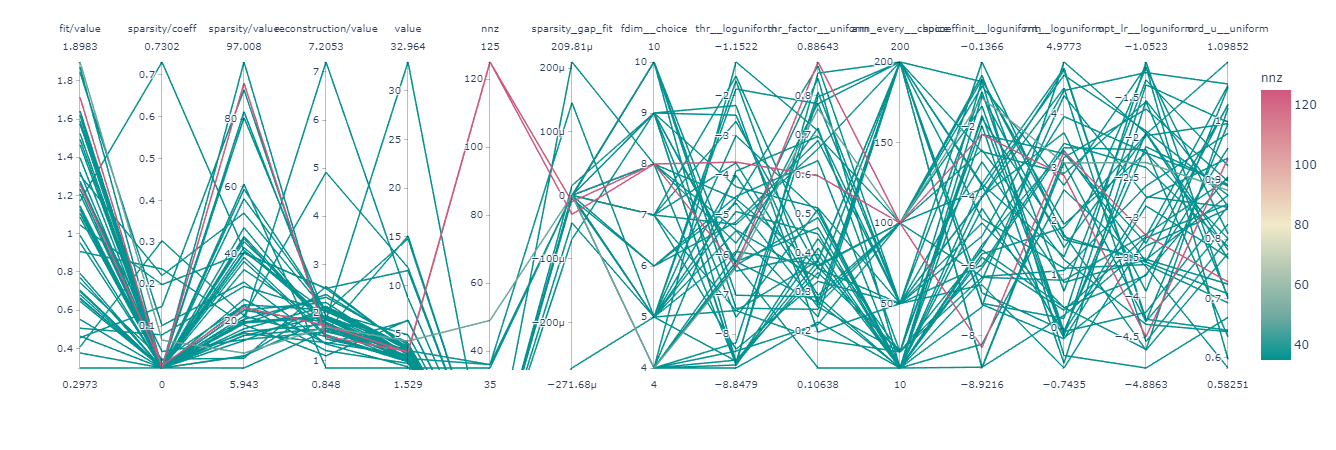

In [75]:
fig = px.parallel_coordinates(df[all_fields], color="metrics/nnz",
                              labels=labels,
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

# Re-writing tensorboard logs

In [ ]:
# trying to re-write tensorboard logs
# see https://stackoverflow.com/questions/60079644/how-do-you-edit-an-existing-tensorboard-training-loss-summary
import sys
from pathlib import Path
import os
# Use this if you want to avoid using the GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
from tensorflow.core.util.event_pb2 import Event
from tensorflow.errors import DataLossError

In [111]:
trial = trials[1]
for trial in tqdm(trials):
    trial_name = trial.split('/')[-1]
    out_path = f'/home/upload/ray_results/{config_name}_filtered_tb/{trial_name}'
    !rm -rf {out_path}
    os.makedirs(out_path, exist_ok=True)
    tf_files = sorted([x for x in os.listdir(trial) if x.startswith('events.out.tfevents')])
    input_path = os.path.join(trial, tf_files[0])
    assert len(tf_files) == 1, tf_files

    with tf.compat.v1.Graph().as_default():
        writer = tf.compat.v1.summary.FileWriter(out_path)

    tags_ = set()

    try:
        for event in tqdm(tf.compat.v1.train.summary_iterator(input_path), leave=False):
            event_type = event.WhichOneof('what')
            if event_type != 'summary':
                writer.add_event(event)
                pass
            else:
                wall_time = event.wall_time
                step = event.step

        #         possible types: simple_value, image, histo, audio
        #         print(value.tag_hparams)
        #         for value in event.summary.value:
        #             if value.tag.startswith('_hparams'):
        #                 print(value)

                filtered_values = [value for value in event.summary.value if value.HasField('simple_value') or value.tag.startswith('_hparams')]
                summary = tf.compat.v1.Summary(value=filtered_values)

                filtered_event = Event(summary=summary,
                                                  wall_time=wall_time,
                                                  step=step)
        #         print(filtered_event)
                writer.add_event(filtered_event)
    except DataLossError as e:
        print(trial, e)
    writer.flush()
    writer.close()

/home/upload/ray_results/small_tune_ve5_linear_stop_after_completes/main_fcn_48f2d_00007_7__gin__ann_every__choice=100,_gin__batchnorm__choice=False,_gin__fdim__choice=4,_gin__opt__choice=Adam,_gin__2020-11-30_22-09-41 truncated record at 9474036


/home/upload/ray_results/small_tune_ve5_linear_stop_after_completes/main_fcn_92643_00005_5__gin__ann_every__choice=100,_gin__batchnorm__choice=True,_gin__fdim__choice=6,_gin__opt__choice=Adam,_gin___2020-11-28_02-37-12 truncated record at 16975227


In [ ]:
!ls -la {input_path}

In [84]:
tags_

{'_hparams_/experiment',
 '_hparams_/session_end_info',
 '_hparams_/session_start_info',
 'ray/tune/CausalModel',
 'ray/tune/checkpoint_size',
 'ray/tune/epochs',
 'ray/tune/iterations_since_restore',
 'ray/tune/loss_opt1',
 'ray/tune/losses/opt1/fit/coeff',
 'ray/tune/losses/opt1/fit/value',
 'ray/tune/losses/opt1/reconstruction/coeff',
 'ray/tune/losses/opt1/reconstruction/value',
 'ray/tune/losses/opt1/sparsity/coeff',
 'ray/tune/losses/opt1/sparsity/value',
 'ray/tune/losses/opt1/value',
 'ray/tune/metrics/nnz',
 'ray/tune/metrics/sparsity_gap_fit',
 'ray/tune/model',
 'ray/tune/n_samples',
 'ray/tune/perf/cpu_util_percent',
 'ray/tune/perf/ram_util_percent',
 'ray/tune/threshold/action',
 'ray/tune/threshold/feature',
 'ray/tune/threshold_learner',
 'ray/tune/time_since_restore',
 'ray/tune/time_this_iter_s',
 'ray/tune/timesteps_since_restore',
 'ray/tune/weights/decoder/fc.weight',
 'ray/tune/weights/model/fc_action.weight',
 'ray/tune/weights/model/fc_features.weight',
 'ray/tu